In [1]:
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
from matplotlib import patches
import tensorflow as tf
from tensorflow.keras.models import load_model
from utils import *
from SISE import SISE as sise
import os
import xml.etree.ElementTree as ET
import time
import pandas as pd
from IPython.display import clear_output

In [2]:
classese = {'aeroplane': 0, 'bicycle': 1, 'bird': 2, 'boat': 3, 'bottle': 4, 'bus': 5, 'car': 6, 'cat': 7, 'chair': 8, 'cow': 9, 'diningtable': 10, 'dog': 11, 'horse': 12, 'motorbike': 13,
 'person': 14, 'pottedplant': 15, 'sheep': 16, 'sofa': 17, 'train': 18, 'tvmonitor': 19}
# classese = {'motorbike': 13, 'person': 14, 'pottedplant': 15, 'sheep': 16, 'sofa': 17, 'train': 18, 'tvmonitor': 19}

label_path = 'D:/dataset/PASCAL_VOC_2007/VOC2007/Annotations'
test_data_path = 'D:/dataset/PASCAL_VOC_2007/VOC2007/test'
img_name_list = []

for class_name, class_index in classese.items():
    print(class_name)
    for annotation in os.listdir(f'{test_data_path}/{class_name}'):
        img_name_list.append((class_name, annotation))


aeroplane
bicycle
bird
boat
bottle
bus
car
cat
chair
cow
diningtable
dog
horse
motorbike
person
pottedplant
sheep
sofa
train
tvmonitor


In [3]:
model = load_model('model/resnet50_voc2007')

In [4]:
test_data = '009122.jpg'
# AC-SISE
ac_sise = sise(model, 'resnet50', f'{test_data_path}/bus/{test_data}', classese['bus'], 0.5, 0)
ac_sise.feature_extractor()
ac_sise.feature_filtering()
ac_sise.filtering_zero_feature_maps()
ac_sise.postprocess()
# ac_sise.attribution_masks_compress()
ac_sise.new_attribution_masks_compress1(1)
ac_sise.generate_layer_visualization_map()
ac_sise.layers_fusion()

In [9]:
ac_sise.postprocessed_feature_maps['conv3'].shape

(224, 224, 120)

In [ ]:
masks = np.expand_dims(tf.transpose(ac_sise.postprocessed_feature_maps['conv3'], perm=[2,0,1]), axis=-1)

In [10]:
ac_sise.input_img.shape

(1, 224, 224, 3)

In [5]:
tree = ET.parse(f'{label_path}/{test_data.replace(".jpg", ".xml")}')
root = tree.getroot()
anno_bbox = get_label(root)
bbox = generate_bbox(normalization(ac_sise.result), 0.2)

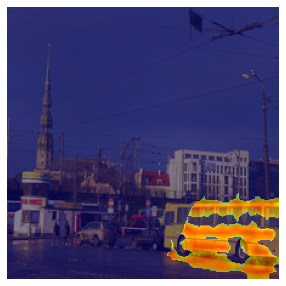

In [21]:
# SISE
plt.figure(figsize=(5,5))
plt.imshow(ac_sise.img)
plt.imshow(normalization(ac_sise.result), cmap='jet', alpha=0.5)
# plt.colorbar()
# ax = plt.gca()
# rect1 = patches.Rectangle((anno_bbox['xmin'], anno_bbox['ymin']), anno_bbox['w'], anno_bbox['h'], linewidth=2, edgecolor='g', facecolor='none')
# rect2 = patches.Rectangle((bbox[1], bbox[0]), (bbox[3]-bbox[1]), (bbox[2]-bbox[0]), linewidth=2, edgecolor='r', facecolor='none')
# ax.add_patch(rect1)
# ax.add_patch(rect2)
plt.axis('off')
plt.show()

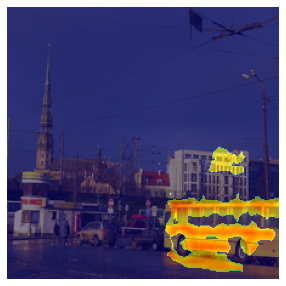

In [22]:
# 바운딩 박스 유사도
test_data = '009122.jpg'
# AC-SISE
ac_sise = sise(model, 'resnet50', f'{test_data_path}/bus/{test_data}', classese['bus'], 0.5, 0)
ac_sise.feature_extractor()
ac_sise.feature_filtering()
ac_sise.filtering_zero_feature_maps()
ac_sise.postprocess()
ac_sise.attribution_masks_compress()
# ac_sise.new_attribution_masks_compress1(1)
ac_sise.generate_layer_visualization_map()
ac_sise.layers_fusion()

plt.figure(figsize=(5,5))
plt.imshow(ac_sise.img)
plt.imshow(normalization(ac_sise.result), cmap='jet', alpha=0.5)
plt.axis('off')
plt.show()

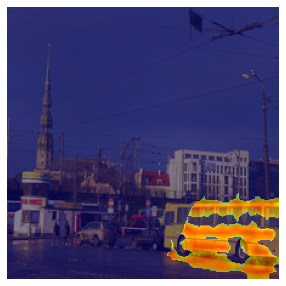

In [23]:
# Bitwise 유사도1
test_data = '009122.jpg'
# AC-SISE
ac_sise = sise(model, 'resnet50', f'{test_data_path}/bus/{test_data}', classese['bus'], 0.5, 0)
ac_sise.feature_extractor()
ac_sise.feature_filtering()
ac_sise.filtering_zero_feature_maps()
ac_sise.postprocess()
# ac_sise.attribution_masks_compress()
ac_sise.new_attribution_masks_compress1(1)
ac_sise.generate_layer_visualization_map()
ac_sise.layers_fusion()

plt.figure(figsize=(5,5))
plt.imshow(ac_sise.img)
plt.imshow(normalization(ac_sise.result), cmap='jet', alpha=0.5)
plt.axis('off')
plt.show()

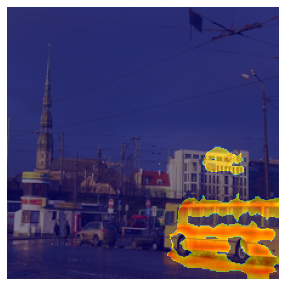

In [24]:
# Bitwise 유사도2
test_data = '009122.jpg'
# AC-SISE
ac_sise = sise(model, 'resnet50', f'{test_data_path}/bus/{test_data}', classese['bus'], 0.5, 0)
ac_sise.feature_extractor()
ac_sise.feature_filtering()
ac_sise.filtering_zero_feature_maps()
ac_sise.postprocess()
# ac_sise.attribution_masks_compress()
ac_sise.new_attribution_masks_compress1(2)
ac_sise.generate_layer_visualization_map()
ac_sise.layers_fusion()

plt.figure(figsize=(5,5))
plt.imshow(ac_sise.img)
plt.imshow(normalization(ac_sise.result), cmap='jet', alpha=0.5)
plt.axis('off')
plt.show()

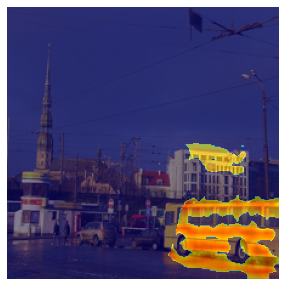

In [25]:
# SSIM
test_data = '009122.jpg'
# AC-SISE
ac_sise = sise(model, 'resnet50', f'{test_data_path}/bus/{test_data}', classese['bus'], 0.5, 0)
ac_sise.feature_extractor()
ac_sise.feature_filtering()
ac_sise.filtering_zero_feature_maps()
ac_sise.postprocess()
# ac_sise.attribution_masks_compress()
ac_sise.new_attribution_masks_compress2()
ac_sise.generate_layer_visualization_map()
ac_sise.layers_fusion()

plt.figure(figsize=(5,5))
plt.imshow(ac_sise.img)
plt.imshow(normalization(ac_sise.result), cmap='jet', alpha=0.5)
plt.axis('off')
plt.show()

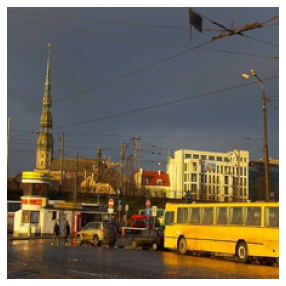

In [26]:
plt.figure(figsize=(5,5))
plt.imshow(ac_sise.img)
plt.axis('off')
plt.show()

In [45]:
g = ac_sise.group_fmaps

In [9]:
fmap = ac_sise.postprocessed_feature_maps

In [77]:
ssim_fmap = ac_sise.postprocessed_feature_maps

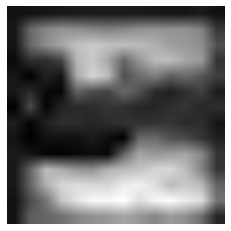

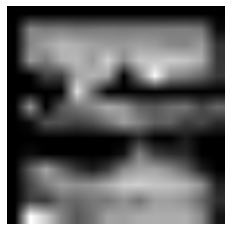

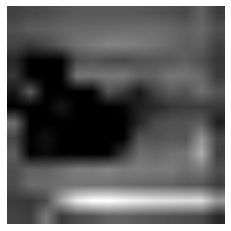

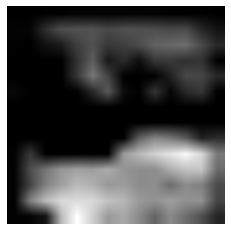

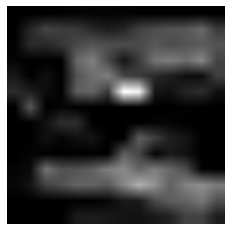

In [79]:
for i in g['conv3'][2]:
    plt.imshow(i, cmap='gray')
    plt.axis('off')
    plt.show()

In [82]:
ssim_fmap['conv3'][:,:,2]

array([[0.06764168, 0.06764168, 0.06764168, ..., 0.0632166 , 0.0632166 ,
        0.0632166 ],
       [0.06764168, 0.06764168, 0.06764168, ..., 0.0632166 , 0.0632166 ,
        0.0632166 ],
       [0.06764168, 0.06764168, 0.06764168, ..., 0.0632166 , 0.0632166 ,
        0.0632166 ],
       ...,
       [0.07283442, 0.07283442, 0.07283442, ..., 0.1396086 , 0.1396086 ,
        0.1396086 ],
       [0.07283442, 0.07283442, 0.07283442, ..., 0.1396086 , 0.1396086 ,
        0.1396086 ],
       [0.07283442, 0.07283442, 0.07283442, ..., 0.1396086 , 0.1396086 ,
        0.1396086 ]], dtype=float32)

In [12]:
a = otsu_binary(ac_sise.postprocessed_feature_maps['conv3'][:,:,9])
b = otsu_binary(ac_sise.postprocessed_feature_maps['conv3'][:,:,207])

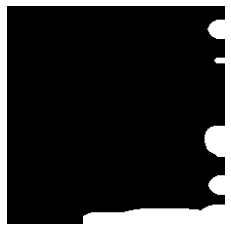

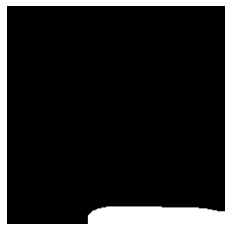

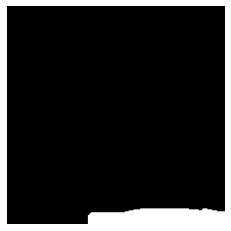

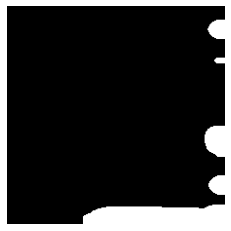

In [16]:
plt.imshow(a, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(b, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(np.bitwise_and(a, b), cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(np.bitwise_or(a, b), cmap='gray')
plt.axis('off')
plt.show()

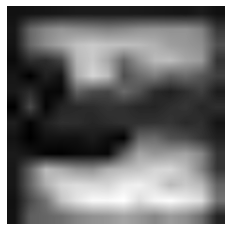

In [83]:
plt.imshow(ssim_fmap['conv3'][:,:,2], cmap='gray')
plt.axis('off')
plt.show()

In [4]:
classese = {'aeroplane': 0, 'bicycle': 1, 'bird': 2, 'boat': 3, 'bottle': 4, 'bus': 5, 'car': 6, 'cat': 7, 'chair': 8, 'cow': 9, 'diningtable': 10, 'dog': 11, 'horse': 12, 'motorbike': 13,
 'person': 14, 'pottedplant': 15, 'sheep': 16, 'sofa': 17, 'train': 18, 'tvmonitor': 19}

label_path = 'D:/dataset/PASCAL_VOC_2007/VOC2007/Annotations'
test_data_path = 'D:/dataset/PASCAL_VOC_2007/VOC2007/test'

# ResNet50

# NEW AC-SISE1 (mask1 & mask2 / mask1)

In [5]:
ebpg_result = list()
iou_result = list()
elapsed_time_list = list()
total_reduction_rate_list = list()

for class_name, class_index in classese.items():
    print(class_name)
    for annotation in os.listdir(f'{test_data_path}/{class_name}'):
        tree = ET.parse(f'{label_path}/{annotation.replace(".jpg", ".xml")}')
        root = tree.getroot()
        anno_bbox = get_label(root)

        ac_sise = sise(model, 'resnet50', f'{test_data_path}/{class_name}/{annotation}', class_index, 0.5, 0)
        ac_sise.feature_extractor()
        ac_sise.feature_filtering()
        ac_sise.filtering_zero_feature_maps()
        ac_sise.postprocess()
        ac_sise.new_attribution_masks_compress1(1)
        start = time.time()
        ac_sise.generate_layer_visualization_map()
        ac_sise.layers_fusion()
        end = time.time()
        
        ebpg_result.append(energy_point_game((round(anno_bbox['xmin']), round(anno_bbox['ymin']), round(anno_bbox['xmax']), round(anno_bbox['ymax'])), ac_sise.result))
        bbox = generate_bbox(normalization(ac_sise.result), 0.2)
        iou_result.append(IoU(bbox, (round(anno_bbox['ymin']), round(anno_bbox['xmin']), round(anno_bbox['ymax']), round(anno_bbox['xmax']))))
        elapsed_time_list.append(end-start)
        total_reduction_rate_list.append(ac_sise.total_reduction_rate)

    df = pd.DataFrame({'ebpg result':ebpg_result, 'iou result':iou_result, 'elapsed time list':elapsed_time_list, 'total reduction rate list': total_reduction_rate_list})
    df.to_excel(excel_writer=f'./resnet50_result/NEW_AC_SISE1_0303/NEW_AC_SISE1_resnet50_{class_name}_0303_iou0.5.xlsx')

aeroplane
000067.jpg
000128.jpg
000216.jpg
000243.jpg
000260.jpg
000316.jpg
000418.jpg
000473.jpg
000521.jpg
000560.jpg
000600.jpg
000618.jpg
000665.jpg
000668.jpg
000696.jpg
000706.jpg
000817.jpg
000846.jpg
000968.jpg
000976.jpg
001046.jpg
001080.jpg
001099.jpg
001126.jpg
001153.jpg
001223.jpg
001305.jpg
001373.jpg
001377.jpg
001433.jpg
001505.jpg
001547.jpg
001568.jpg
001621.jpg
001660.jpg
001783.jpg
001848.jpg
001850.jpg
001884.jpg
001885.jpg
001912.jpg
001929.jpg
001994.jpg
001996.jpg
002007.jpg
002014.jpg
002052.jpg
002089.jpg
002107.jpg
002110.jpg
002157.jpg
002198.jpg
002217.jpg
002246.jpg
002357.jpg
002467.jpg
002583.jpg
002619.jpg
002629.jpg
002661.jpg
002665.jpg
002703.jpg
002707.jpg
002754.jpg
002769.jpg
002822.jpg
002843.jpg
002851.jpg
002894.jpg
002908.jpg
002949.jpg
002971.jpg
003037.jpg
003144.jpg
003160.jpg
003209.jpg
003230.jpg
003268.jpg
003347.jpg
003372.jpg
003381.jpg
003445.jpg
003478.jpg
003494.jpg
003574.jpg
003823.jpg
003931.jpg
004078.jpg
004153.jpg
004199.jpg


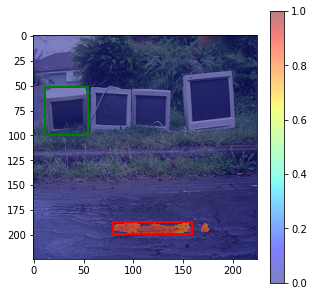

In [6]:
plt.figure(figsize=(5,5))
plt.imshow(ac_sise.img)
plt.imshow(normalization(ac_sise.result), cmap='jet', alpha=0.5)
plt.colorbar()
ax = plt.gca()
rect1 = patches.Rectangle((anno_bbox['xmin'], anno_bbox['ymin']), anno_bbox['w'], anno_bbox['h'], linewidth=2, edgecolor='g', facecolor='none')
rect2 = patches.Rectangle((bbox[1], bbox[0]), (bbox[3]-bbox[1]), (bbox[2]-bbox[0]), linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect1)
ax.add_patch(rect2)
plt.show()

In [7]:
print('Mean EBPG:', sum(ebpg_result)/len(ebpg_result))
print('Mean IoU:', sum(iou_result)/len(iou_result))
print('Mean elapsed time:', sum(elapsed_time_list)/len(elapsed_time_list))
print('Mean total reduction rate:', sum(total_reduction_rate_list)/len(total_reduction_rate_list))

Mean EBPG: 0.47204177397064767
Mean IoU: 0.08577271808175893
Mean elapsed time: 1.8688843319287878
Mean total reduction rate: -85.22033436732242


In [8]:
df = pd.DataFrame({'ebpg result':ebpg_result, 'iou result':iou_result, 'elapsed time list':elapsed_time_list, 'total reduction rate list': total_reduction_rate_list})

In [9]:
df.to_excel(excel_writer='NEW_AC_SISE1_resnet50_iou0.5.xlsx')

# NEW AC-SISE2 (mask1 & mask2 / mask1 | mask2)

In [10]:
ebpg_result = list()
iou_result = list()
elapsed_time_list = list()
total_reduction_rate_list = list()

for class_name, class_index in classese.items():
    print(class_name)
    for annotation in os.listdir(f'{test_data_path}/{class_name}'):
        tree = ET.parse(f'{label_path}/{annotation.replace(".jpg", ".xml")}')
        root = tree.getroot()
        anno_bbox = get_label(root)

        ac_sise = sise(model, 'resnet50', f'{test_data_path}/{class_name}/{annotation}', class_index, 0.5, 0)
        ac_sise.feature_extractor()
        ac_sise.feature_filtering()
        ac_sise.filtering_zero_feature_maps()
        ac_sise.postprocess()
        ac_sise.new_attribution_masks_compress1(2)
        start = time.time()
        ac_sise.generate_layer_visualization_map()
        ac_sise.layers_fusion()
        end = time.time()
        
        ebpg_result.append(energy_point_game((round(anno_bbox['xmin']), round(anno_bbox['ymin']), round(anno_bbox['xmax']), round(anno_bbox['ymax'])), ac_sise.result))
        bbox = generate_bbox(normalization(ac_sise.result), 0.2)
        iou_result.append(IoU(bbox, (round(anno_bbox['ymin']), round(anno_bbox['xmin']), round(anno_bbox['ymax']), round(anno_bbox['xmax']))))
        elapsed_time_list.append(end-start)
        total_reduction_rate_list.append(ac_sise.total_reduction_rate)

    df = pd.DataFrame({'ebpg result':ebpg_result, 'iou result':iou_result, 'elapsed time list':elapsed_time_list, 'total reduction rate list': total_reduction_rate_list})
    df.to_excel(excel_writer=f'./resnet50_result/NEW_AC_SISE2_0307/NEW_AC_SISE2_resnet50_{class_name}_0307_iou0.5.xlsx')

aeroplane
bicycle
bird
boat
bottle
bus
car
cat
chair
cow
diningtable
dog
horse
motorbike
person
pottedplant
sheep
sofa
train
tvmonitor


In [11]:
df = pd.DataFrame({'ebpg result':ebpg_result, 'iou result':iou_result, 'elapsed time list':elapsed_time_list, 'total reduction rate list': total_reduction_rate_list})
df.to_excel(excel_writer='NEW_AC_SISE2_resnet50_iou0.5.xlsx')

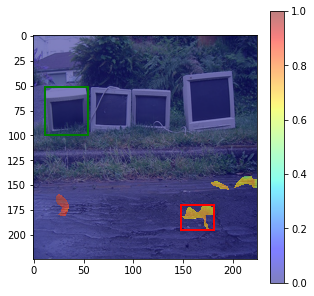

In [12]:
plt.figure(figsize=(5,5))
plt.imshow(ac_sise.img)
plt.imshow(normalization(ac_sise.result), cmap='jet', alpha=0.5)
plt.colorbar()
ax = plt.gca()
rect1 = patches.Rectangle((anno_bbox['xmin'], anno_bbox['ymin']), anno_bbox['w'], anno_bbox['h'], linewidth=2, edgecolor='g', facecolor='none')
rect2 = patches.Rectangle((bbox[1], bbox[0]), (bbox[3]-bbox[1]), (bbox[2]-bbox[0]), linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect1)
ax.add_patch(rect2)
plt.show()

In [17]:
ebpg_result = list()
iou_result = list()
elapsed_time_list = list()
total_reduction_rate_list = list()

index = 0

for class_name, class_index in classese.items():
    print(class_name)
    for annotation in os.listdir(f'{test_data_path}/{class_name}'):
        tree = ET.parse(f'{label_path}/{annotation.replace(".jpg", ".xml")}')
        root = tree.getroot()
        anno_bbox = get_label(root)

        ac_sise = sise(model, 'resnet50', f'{test_data_path}/{class_name}/{annotation}', class_index, 0.5, 0)
        ac_sise.feature_extractor()
        ac_sise.feature_filtering()
        ac_sise.filtering_zero_feature_maps()
        ac_sise.postprocess()
        ac_sise.new_attribution_masks_compress2()
        start = time.time()
        ac_sise.generate_layer_visualization_map()
        ac_sise.layers_fusion()
        end = time.time()
        
        ebpg_result.append(energy_point_game((round(anno_bbox['xmin']), round(anno_bbox['ymin']), round(anno_bbox['xmax']), round(anno_bbox['ymax'])), ac_sise.result))
        bbox = generate_bbox(normalization(ac_sise.result), 0.2)
        iou_result.append(IoU(bbox, (round(anno_bbox['ymin']), round(anno_bbox['xmin']), round(anno_bbox['ymax']), round(anno_bbox['xmax']))))
        elapsed_time_list.append(end-start)
        total_reduction_rate_list.append(ac_sise.total_reduction_rate)
        index+=1
        clear_output
        print(f'{index}/7013')

    df = pd.DataFrame({'ebpg result':ebpg_result, 'iou result':iou_result, 'elapsed time list':elapsed_time_list, 'total reduction rate list': total_reduction_rate_list})
    df.to_excel(excel_writer=f'./resnet50_result/NEW_AC_SISE3_0310/NEW_AC_SISE3_resnet50_{class_name}_0307_iou0.5.xlsx')

aeroplane
1/7013
2/7013
3/7013
4/7013
5/7013
6/7013
7/7013
8/7013
9/7013
10/7013
11/7013
12/7013
13/7013
14/7013
15/7013
16/7013
17/7013
18/7013
19/7013
20/7013
21/7013
22/7013
23/7013
24/7013
25/7013
26/7013
27/7013
28/7013
29/7013
30/7013
31/7013
32/7013
33/7013
34/7013
35/7013
36/7013
37/7013
38/7013
39/7013
40/7013
41/7013
42/7013
43/7013
44/7013
45/7013
46/7013
47/7013
48/7013
49/7013
50/7013
51/7013
52/7013
53/7013
54/7013
55/7013
56/7013
57/7013
58/7013
59/7013
60/7013
61/7013
62/7013
63/7013
64/7013
65/7013
66/7013
67/7013
68/7013
69/7013
70/7013
71/7013
72/7013
73/7013
74/7013
75/7013
76/7013
77/7013
78/7013
79/7013
80/7013
81/7013
82/7013
83/7013
84/7013
85/7013
86/7013
87/7013
88/7013
89/7013
90/7013
91/7013
92/7013
93/7013
94/7013
95/7013
96/7013
97/7013
98/7013
99/7013
100/7013
101/7013
102/7013
103/7013
104/7013
105/7013
106/7013
107/7013
108/7013
109/7013
110/7013
111/7013
112/7013
113/7013
114/7013
115/7013
116/7013
117/7013
118/7013
119/7013
120/7013
121/7013
122/7013


In [18]:
df = pd.DataFrame({'ebpg result':ebpg_result, 'iou result':iou_result, 'elapsed time list':elapsed_time_list, 'total reduction rate list': total_reduction_rate_list})
df.to_excel(excel_writer='NEW_AC_SISE3_resnet50_iou0.5.xlsx')

# VGG16

In [3]:
tf.keras.backend.clear_session()
model = load_model('model/vgg16_voc2007')

# NEW AC-SISE1 (mask1 & mask2 / mask1)

In [20]:
ebpg_result = list()
iou_result = list()
elapsed_time_list = list()
total_reduction_rate_list = list()

index = 0

for class_name, class_index in classese.items():
    print(class_name)
    for annotation in os.listdir(f'{test_data_path}/{class_name}'):
        tree = ET.parse(f'{label_path}/{annotation.replace(".jpg", ".xml")}')
        root = tree.getroot()
        anno_bbox = get_label(root)

        ac_sise = sise(model, 'vgg16', f'{test_data_path}/{class_name}/{annotation}', class_index, 0.5, 0)
        ac_sise.feature_extractor()
        ac_sise.feature_filtering()
        ac_sise.filtering_zero_feature_maps()
        ac_sise.postprocess()
        ac_sise.new_attribution_masks_compress1(1)
        start = time.time()
        ac_sise.generate_layer_visualization_map()
        ac_sise.layers_fusion()
        end = time.time()
        
        ebpg_result.append(energy_point_game((round(anno_bbox['xmin']), round(anno_bbox['ymin']), round(anno_bbox['xmax']), round(anno_bbox['ymax'])), ac_sise.result))
        bbox = generate_bbox(normalization(ac_sise.result), 0.2)
        iou_result.append(IoU(bbox, (round(anno_bbox['ymin']), round(anno_bbox['xmin']), round(anno_bbox['ymax']), round(anno_bbox['xmax']))))
        elapsed_time_list.append(end-start)
        total_reduction_rate_list.append(ac_sise.total_reduction_rate)
        index+=1
        print(f'{index}/7013')

    df = pd.DataFrame({'ebpg result':ebpg_result, 'iou result':iou_result, 'elapsed time list':elapsed_time_list, 'total reduction rate list': total_reduction_rate_list})
    df.to_excel(excel_writer=f'./vgg16_result/NEW_AC_SISE1/NEW_AC_SISE1_vgg16_{class_name}_iou0.5.xlsx')

aeroplane
1/7013
2/7013
3/7013
4/7013
5/7013
6/7013
7/7013
8/7013
9/7013
10/7013
11/7013
12/7013
13/7013
14/7013
15/7013
16/7013
17/7013
18/7013
19/7013
20/7013
21/7013
22/7013
23/7013
24/7013
25/7013
26/7013
27/7013
28/7013
29/7013
30/7013
31/7013
32/7013
33/7013
34/7013
35/7013
36/7013
37/7013
38/7013
39/7013
40/7013
41/7013
42/7013
43/7013
44/7013
45/7013
46/7013
47/7013
48/7013
49/7013
50/7013
51/7013
52/7013
53/7013
54/7013
55/7013
56/7013
57/7013
58/7013
59/7013
60/7013
61/7013
62/7013
63/7013
64/7013
65/7013
66/7013
67/7013
68/7013
69/7013
70/7013
71/7013
72/7013
73/7013
74/7013
75/7013
76/7013
77/7013
78/7013
79/7013
80/7013
81/7013
82/7013
83/7013
84/7013
85/7013
86/7013
87/7013
88/7013
89/7013
90/7013
91/7013
92/7013
93/7013
94/7013
95/7013
96/7013
97/7013
98/7013
99/7013
100/7013
101/7013
102/7013
103/7013
104/7013
105/7013
106/7013
107/7013
108/7013
109/7013
110/7013
111/7013
112/7013
113/7013
114/7013
115/7013
116/7013
117/7013
118/7013
119/7013
120/7013
121/7013
122/7013


In [ ]:
df = pd.DataFrame({'ebpg result':ebpg_result, 'iou result':iou_result, 'elapsed time list':elapsed_time_list, 'total reduction rate list': total_reduction_rate_list})
df.to_excel(excel_writer='NEW_AC_SISE1_vgg16_iou0.5.xlsx')

# NEW AC-SISE2 (mask1 & mask2 / mask1 | mask2)

In [4]:
ebpg_result = list()
iou_result = list()
elapsed_time_list = list()
total_reduction_rate_list = list()

index = 0

for class_name, class_index in classese.items():
    print(class_name)
    for annotation in os.listdir(f'{test_data_path}/{class_name}'):
        tree = ET.parse(f'{label_path}/{annotation.replace(".jpg", ".xml")}')
        root = tree.getroot()
        anno_bbox = get_label(root)

        ac_sise = sise(model, 'vgg16', f'{test_data_path}/{class_name}/{annotation}', class_index, 0.5, 0)
        ac_sise.feature_extractor()
        ac_sise.feature_filtering()
        ac_sise.filtering_zero_feature_maps()
        ac_sise.postprocess()
        ac_sise.new_attribution_masks_compress1(2)
        start = time.time()
        ac_sise.generate_layer_visualization_map()
        ac_sise.layers_fusion()
        end = time.time()
        
        ebpg_result.append(energy_point_game((round(anno_bbox['xmin']), round(anno_bbox['ymin']), round(anno_bbox['xmax']), round(anno_bbox['ymax'])), ac_sise.result))
        bbox = generate_bbox(normalization(ac_sise.result), 0.2)
        iou_result.append(IoU(bbox, (round(anno_bbox['ymin']), round(anno_bbox['xmin']), round(anno_bbox['ymax']), round(anno_bbox['xmax']))))
        elapsed_time_list.append(end-start)
        total_reduction_rate_list.append(ac_sise.total_reduction_rate)
        index+=1
        print(f'{index}/7013')

    df = pd.DataFrame({'ebpg result':ebpg_result, 'iou result':iou_result, 'elapsed time list':elapsed_time_list, 'total reduction rate list': total_reduction_rate_list})
    df.to_excel(excel_writer=f'./vgg16_result/NEW_AC_SISE2/NEW_AC_SISE2_vgg16_{class_name}_iou0.5.xlsx')

motorbike
1/7013
2/7013
3/7013
4/7013
5/7013
6/7013
7/7013
8/7013
9/7013
10/7013
11/7013
12/7013
13/7013
14/7013
15/7013
16/7013
17/7013
18/7013
19/7013
20/7013
21/7013
22/7013
23/7013
24/7013
25/7013
26/7013
27/7013
28/7013
29/7013
30/7013
31/7013
32/7013
33/7013
34/7013
35/7013
36/7013
37/7013
38/7013
39/7013
40/7013
41/7013
42/7013
43/7013
44/7013
45/7013
46/7013
47/7013
48/7013
49/7013
50/7013
51/7013
52/7013
53/7013
54/7013
55/7013
56/7013
57/7013
58/7013
59/7013
60/7013
61/7013
62/7013
63/7013
64/7013
65/7013
66/7013
67/7013
68/7013
69/7013
70/7013
71/7013
72/7013
73/7013
74/7013
75/7013
76/7013
77/7013
78/7013
79/7013
80/7013
81/7013
82/7013
83/7013
84/7013
85/7013
86/7013
87/7013
88/7013
89/7013
90/7013
91/7013
92/7013
93/7013
94/7013
95/7013
96/7013
97/7013
98/7013
99/7013
100/7013
101/7013
102/7013
103/7013
104/7013
105/7013
106/7013
107/7013
108/7013
109/7013
110/7013
111/7013
112/7013
113/7013
114/7013
115/7013
116/7013
117/7013
118/7013
119/7013
120/7013
121/7013
122/7013


In [5]:
df = pd.DataFrame({'ebpg result':ebpg_result, 'iou result':iou_result, 'elapsed time list':elapsed_time_list, 'total reduction rate list': total_reduction_rate_list})
df.to_excel(excel_writer='NEW_AC_SISE2_vgg16_iou0.5.xlsx')

# NEW AC-SISE3 (SSIM)

In [21]:
ebpg_result = list()
iou_result = list()
elapsed_time_list = list()
total_reduction_rate_list = list()

index = 0

for class_name, class_index in classese.items():
    print(class_name)
    for annotation in os.listdir(f'{test_data_path}/{class_name}'):
        tree = ET.parse(f'{label_path}/{annotation.replace(".jpg", ".xml")}')
        root = tree.getroot()
        anno_bbox = get_label(root)

        ac_sise = sise(model, 'vgg16', f'{test_data_path}/{class_name}/{annotation}', class_index, 0.5, 0)
        ac_sise.feature_extractor()
        ac_sise.feature_filtering()
        ac_sise.filtering_zero_feature_maps()
        ac_sise.postprocess()
        ac_sise.new_attribution_masks_compress2()
        start = time.time()
        ac_sise.generate_layer_visualization_map()
        ac_sise.layers_fusion()
        end = time.time()
        
        ebpg_result.append(energy_point_game((round(anno_bbox['xmin']), round(anno_bbox['ymin']), round(anno_bbox['xmax']), round(anno_bbox['ymax'])), ac_sise.result))
        bbox = generate_bbox(normalization(ac_sise.result), 0.2)
        iou_result.append(IoU(bbox, (round(anno_bbox['ymin']), round(anno_bbox['xmin']), round(anno_bbox['ymax']), round(anno_bbox['xmax']))))
        elapsed_time_list.append(end-start)
        total_reduction_rate_list.append(ac_sise.total_reduction_rate)
        index+=1
        print(f'{index}/7013')

    df = pd.DataFrame({'ebpg result':ebpg_result, 'iou result':iou_result, 'elapsed time list':elapsed_time_list, 'total reduction rate list': total_reduction_rate_list})
    df.to_excel(excel_writer=f'./vgg16_result/NEW_AC_SISE3/NEW_AC_SISE3_vgg16_{class_name}_iou0.5.xlsx')

aeroplane
1/7013
2/7013
3/7013
4/7013
5/7013
6/7013
7/7013
8/7013
9/7013
10/7013
11/7013
12/7013
13/7013
14/7013
15/7013
16/7013
17/7013
18/7013
19/7013
20/7013
21/7013
22/7013
23/7013
24/7013
25/7013
26/7013
27/7013
28/7013
29/7013
30/7013
31/7013
32/7013
33/7013
34/7013
35/7013
36/7013
37/7013
38/7013
39/7013
40/7013
41/7013
42/7013
43/7013
44/7013
45/7013
46/7013
47/7013
48/7013
49/7013
50/7013
51/7013
52/7013
53/7013
54/7013
55/7013
56/7013
57/7013
58/7013
59/7013
60/7013
61/7013
62/7013
63/7013
64/7013
65/7013
66/7013
67/7013
68/7013
69/7013
70/7013
71/7013
72/7013
73/7013
74/7013
75/7013
76/7013
77/7013
78/7013
79/7013
80/7013
81/7013
82/7013
83/7013
84/7013
85/7013
86/7013
87/7013
88/7013
89/7013
90/7013
91/7013
92/7013
93/7013
94/7013
95/7013
96/7013
97/7013
98/7013
99/7013
100/7013
101/7013
102/7013
103/7013
104/7013
105/7013
106/7013
107/7013
108/7013
109/7013
110/7013
111/7013
112/7013
113/7013
114/7013
115/7013
116/7013
117/7013
118/7013
119/7013
120/7013
121/7013
122/7013


In [22]:
df = pd.DataFrame({'ebpg result':ebpg_result, 'iou result':iou_result, 'elapsed time list':elapsed_time_list, 'total reduction rate list': total_reduction_rate_list})
df.to_excel(excel_writer='NEW_AC_SISE3_vgg16_iou0.5.xlsx')